# All in or Nothing - Success Factors for Kickstarter Campaigns¶


## 1. Preparation

In [1]:
%matplotlib inline
import numpy as np 
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data-Import

In [2]:
raw_data = pd.read_csv(os.path.join("input", "ks-projects-201801.csv"))

In [3]:
# View of data structure
raw_data.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


## 3.  First insights

In [4]:
print('Data set includes ', raw_data.shape[0], 'rows and', raw_data.shape[1], 'columns.')

Data set includes  378661 rows and 15 columns.


In [5]:
# Der Datensatz weist 15 Spalten mit folgenden Merkmalen auf: 

# name                Index
# ID                  Kickstarter-ID
# category            Unterkategorie
# main_category       Hauptkategorie
# currency            Währung
# deadline            Enddatum der Kampagne
# launched            Startdatum der Kampagne
# state               Status der Kampagne 
# backers             Anzahl Unterstützer 
# country             Land
# usd_pledged_real    gesammelte Unterstützung in USD (gesamt,andere Währungen umgrechnet in USD)
# usd_goal_real       Zielbetrag in USD (gesamt,andere Währungen umgrechnet in USD)

# goal                Zielbetrag in unterschiedlichen Währungen
# pledged             gesammelte Unterstützung in unterschiedlichen Währungen
# usd pledged         gesammelte Unterstützung in USD

In [6]:
raw_data.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [7]:
# missing values
raw_data.isna().sum()

# 4 missing values in "name"
# 3797 missing values in "usd pledged"
# No effect on the analysis, since this data is not used for evaluation.

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [8]:
# "main category"
raw_data["main_category"].value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

<AxesSubplot:>

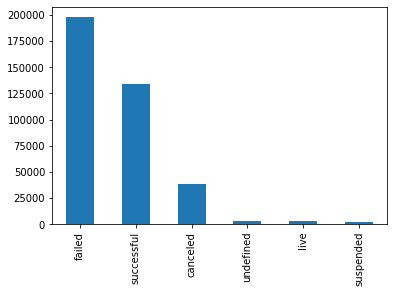

In [9]:
# "States"
raw_data["state"].value_counts().plot.bar()

# In addition to successful and failed projects, further states are distinguished:
# canceled, undefined, live and suspended

In [10]:
# "states", percentage distribution
raw_data["state"].value_counts(normalize=True).round(4)*100

# over 10% of the campaigns = "canceled"

failed        52.22
successful    35.38
canceled      10.24
undefined      0.94
live           0.74
suspended      0.49
Name: state, dtype: float64

In [11]:
# "country", Kickstarter campaigns by country
# country name N,0" --> without country name
raw_data["country"].value_counts()

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

## 4. Data Preparation

In [12]:
# Removing variables that allow identification (name und ID)
# Removal of variables that are not needed for analysis (pledged, usd_pledged, goal)
data = raw_data.copy()
data = data.drop(["name", "ID", "pledged", "usd pledged", "goal"], axis=1)

### 4.1. New variable: clean_data 
All data records were filtered out with a clear assignment: "successful" or "failed".
Only these data records are meaningful for the chance of success of a campaign.
Lines with the arguments "canceled", "undefined", "live" and "suspended" were removed.

In [13]:
clean_data= data[(data['state'] == 'successful') | (data['state'] == 'failed')]

In [14]:
print('Data set includes ', clean_data.shape[0], 'rows and', clean_data.shape[1], 'columns.')

Data set includes  331675 rows and 10 columns.


In [15]:
clean_data.head()

,category,main_category,currency,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
0,Poetry,Publishing,GBP,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95
1,Narrative Film,Film & Video,USD,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00
2,Narrative Film,Film & Video,USD,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00
3,Music,Music,USD,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00
5,Restaurants,Food,USD,2016-04-01,2016-02-26 13:38:27,successful,224,US,52375.0,50000.00


### 4.2 New variable: "clean_data_country", cleaned by "N,O" (for H2)
Delete records without unique country name from the dataset.

In [16]:
clean_data['country'].value_counts()

US      261360
GB       29454
CA       12370
AU        6616
DE        3436
FR        2520
NL        2411
IT        2369
ES        1873
SE        1509
MX        1411
NZ        1274
DK         926
IE         683
CH         652
NO         582
BE         523
AT         485
HK         477
SG         454
N,0"       210
LU          57
JP          23
Name: country, dtype: int64

In [17]:
clean_data_country= clean_data[(clean_data['country'] != 'N,0\"')]

In [18]:
clean_data_country['country'].value_counts()

US    261360
GB     29454
CA     12370
AU      6616
DE      3436
FR      2520
NL      2411
IT      2369
ES      1873
SE      1509
MX      1411
NZ      1274
DK       926
IE       683
CH       652
NO       582
BE       523
AT       485
HK       477
SG       454
LU        57
JP        23
Name: country, dtype: int64

In [19]:
print('Data set includes ', clean_data_country.shape[0], 'rows and', clean_data_country.shape[1], 'columns.')

Data set includes  331465 rows and 10 columns.


### 4.3 New function for H3: Classification of the goal amount in 6 levels.
The dataset provides a variable "goal" and a variable "usd_goal_real". The "usd_goal_real" is used, which contains only dollar amounts and thus ensures comparability. Other currencies have been converted to dollars. The classes are divided into steps of different sizes, which were determined based on the actual distribution.

In [20]:
def goal_group(kick):
    if kick["usd_goal_real"] <= 500:
        return "(1) 0-500"
    elif kick["usd_goal_real"] >501 and kick["usd_goal_real"] <= 1000:
        return "(2) 501-1000"
    elif kick["usd_goal_real"] >1001 and kick["usd_goal_real"] <= 5000:
        return "(3) 1001-5000"
    elif kick["usd_goal_real"] >5001 and kick["usd_goal_real"] <= 15000:
        return "(4) 5001-15000"
    elif kick["usd_goal_real"] >15001 and kick["usd_goal_real"] <= 100000:
        return "(5) 15001-100000"
    else:
        return "(6) >100000"

In [21]:
demo_kick = {"usd_goal_real": 31825}
goal_group(demo_kick)

'(5) 15001-100000'

In [22]:
clean_data["goal_levels"] = data.apply(goal_group, axis=1)

C:\Users\Conny\AppData\Local\Temp\ipykernel_2640\3659651741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["goal_levels"] = data.apply(goal_group, axis=1)


### 4.4 New variable for H4: Campaign runtime
The dataset provides a variable "launched" and a varaible "deadline". The runtime of the campaign is determined from the contained data.

In [23]:
# Delete time from "launched" --> "launch_date"
clean_data['launch_date'] = pd.to_datetime(clean_data['launched']).dt.normalize()
clean_data['deadline'] = pd.to_datetime(clean_data['deadline']).dt.normalize()

C:\Users\Conny\AppData\Local\Temp\ipykernel_2640\447945084.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['launch_date'] = pd.to_datetime(clean_data['launched']).dt.normalize()
C:\Users\Conny\AppData\Local\Temp\ipykernel_2640\447945084.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['deadline'] = pd.to_datetime(clean_data['deadline']).dt.normalize()


In [24]:
# Difference time between start and end of the campaign
clean_data['lifespan'] = clean_data['deadline'] - clean_data['launch_date']
# Convert time to days
clean_data['lifespan'] = clean_data['lifespan'] / np.timedelta64(1,'D')

C:\Users\Conny\AppData\Local\Temp\ipykernel_2640\1080845860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['lifespan'] = clean_data['deadline'] - clean_data['launch_date']
C:\Users\Conny\AppData\Local\Temp\ipykernel_2640\1080845860.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['lifespan'] = clean_data['lifespan'] / np.timedelta64(1,'D')


In [25]:
clean_data["lifespan"].describe()

count    331675.000000
mean         33.954875
std          12.713332
min           1.000000
25%          30.000000
50%          30.000000
75%          36.000000
max          92.000000
Name: lifespan, dtype: float64

## 5. Analysis

### 5.1 H1: Influence category --> chances of success
Assumption: The category - i.e. the type of creative project (e.g. music, film, design or comics) - has an influence on the chances of success of the Croudfunding campaign.

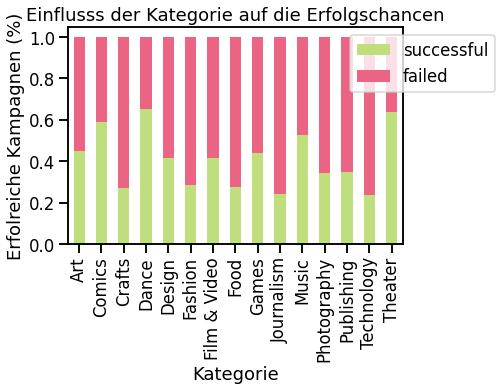

In [26]:
# Proportion of successful and failed campaigns per category:

sns.set_context('talk')  #design
sns.set_palette(['#BFDF7F', '#EC6484'])

table = pd.crosstab(clean_data["main_category"], clean_data["state"], normalize="index")   
table = table[['successful', 'failed']]   #turn values
table.plot.bar(stacked=True)

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))   # legend outside graph
plt.rcParams["figure.figsize"] = [10, 10]    #resize
plt.title("Einflusss der Kategorie auf die Erfolgschancen")   #title
plt.xlabel("Kategorie")
plt.ylabel("Erfolreiche Kampagnen (%)");

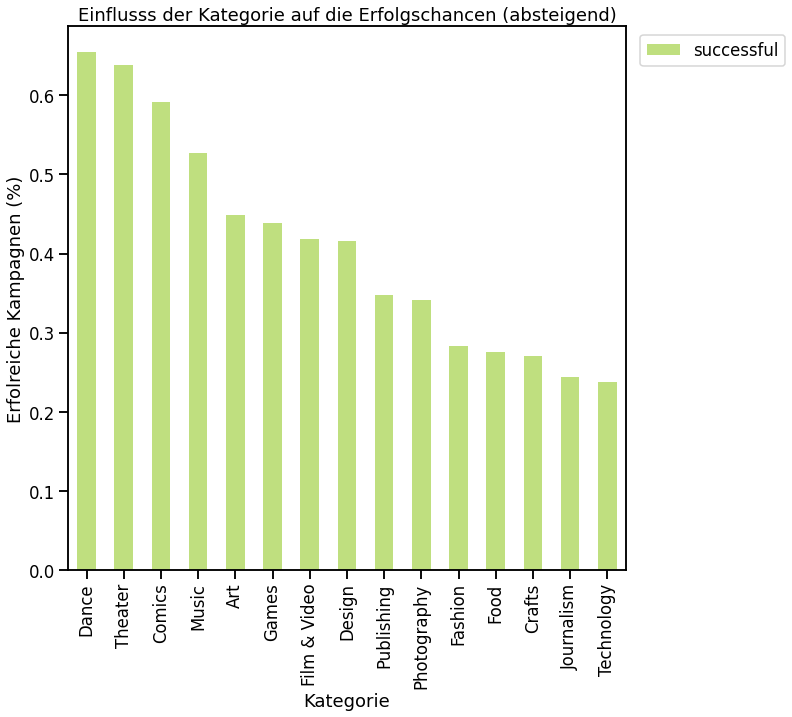

In [27]:
# promising categoriesin (descending):

sns.set_context('talk')  #design
sns.set_palette(['#BFDF7F'])

table = pd.crosstab(clean_data["main_category"], clean_data["state"], normalize="index")   #turn values
table = table[['successful']]
table.sort_values("successful", ascending=False).plot.bar()

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))   # legend outside graph
plt.rcParams["figure.figsize"] = [10, 10]    #resize
plt.title("Einflusss der Kategorie auf die Erfolgschancen (absteigend)")   #title
plt.xlabel("Kategorie")
plt.ylabel("Erfolreiche Kampagnen (%)");

In [28]:
# promising categoriesin (descending percentage):

table_best = pd.crosstab(clean_data["main_category"], clean_data["state"], normalize="index")*100
table_best = table_best.round(decimals=2).sort_values("successful", ascending=False)
table_best = table_best[['successful', 'failed']]
table_best


state,successful,failed
main_category,,
Dance,65.44,34.56
Theater,63.80,36.20
Comics,59.14,40.86
Music,52.66,47.34
Art,44.89,55.11
Games,43.89,56.11
Film & Video,41.79,58.21
Design,41.59,58.41
Publishing,34.70,65.30


### 5.2 H2: Influence of the country--> chances of success
Assumption: Kickstarter is internationally positioned, but is probably not promoted in the same way in every country or differs in the willingness of backers. The hypothesis is: The country has a direct influence on the project's chances of success.

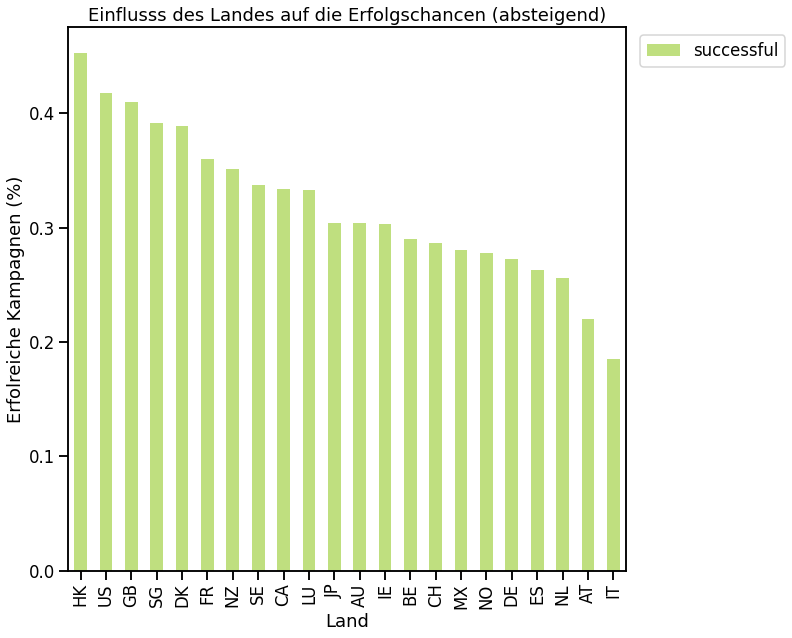

In [29]:
# percentage of successful campaigns by country (descending):

sns.set_context('talk')  #design
sns.set_palette(['#BFDF7F'])

table = pd.crosstab(clean_data_country["country"], clean_data_country["state"], normalize="index")   #turn values
table = table[['successful']]
table.sort_values("successful", ascending=False).plot.bar()

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))   # legend outside graph
plt.rcParams["figure.figsize"] = [10,10]    #resize
plt.title("Einflusss des Landes auf die Erfolgschancen (absteigend)")   #title
plt.xlabel("Land")
plt.ylabel("Erfolreiche Kampagnen (%)");

### 5.3 H3: Influence of the target amount--> chances of success.
Assumption: The target amount to be reached in the croudfunding campaign could have an influence on the chances of success. 
The hypothesis is: small target amounts are easier to achieve than large ones.        

In [30]:
clean_data.usd_goal_real.describe()

# Distribution of target amounts over a wide range- from 0.01 to 1,000,000 USD.
# Most of the target amounts are between 2,000 and 15,000 USD (skewed distribution)
# The average is 41,510 USD

count    3.316750e+05
mean     4.151000e+04
std      1.108930e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.000000e+03
75%      1.500000e+04
max      1.663614e+08
Name: usd_goal_real, dtype: float64

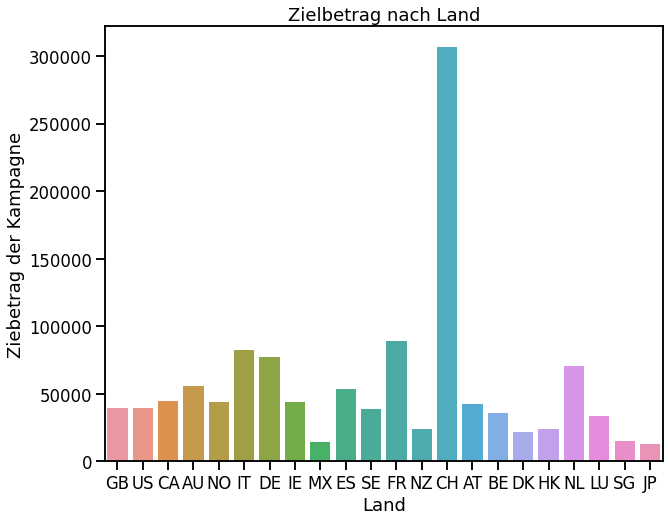

In [31]:
# Target amount by country
# Switzerland is out of the ordinary in terms of the target amounts it is aiming for.
# France, Italy, Germany and the Netherlands aim for comparatively high average target amounts.

sns.set_context('talk')  #design
sns.set_palette(['#EC6484','#BFDF7F'])

plt.figure(figsize=(10, 8))  #resize Plot!
sns.barplot(data=clean_data_country, x="country", y="usd_goal_real", ci = 0)

plt.rcParams["figure.figsize"] = [20,20]    #resize
plt.title("Zielbetrag nach Land")   #title
plt.xlabel("Land")
plt.ylabel("Ziebetrag der Kampagne");

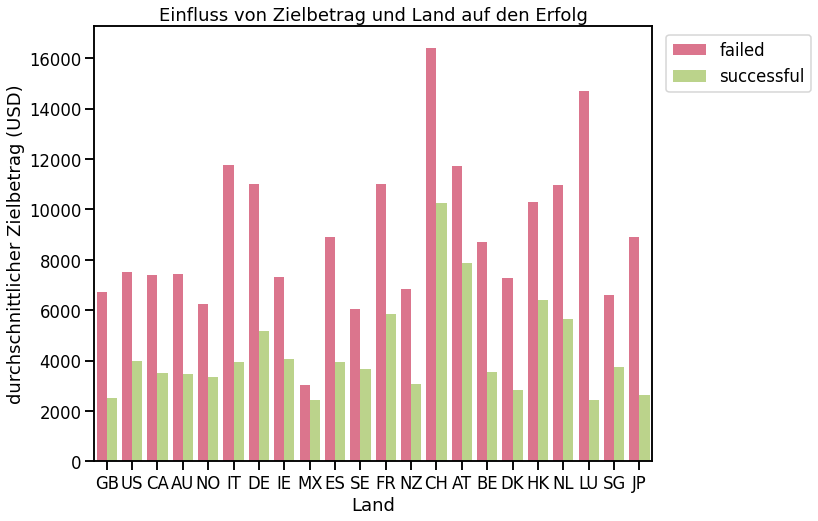

In [32]:
#Target amount and success by country

sns.set_context('talk')  #design
sns.set_palette(['#EC6484','#BFDF7F'])

plt.figure(figsize=(10, 8))  #resize Plot!
sns.barplot(data=clean_data_country, x="country", y="usd_goal_real", hue="state",
            estimator = np.median,
            ci = 0)

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))   # legend outside graph
plt.rcParams["figure.figsize"] = [20,20]    #resize
plt.title("Einfluss von Zielbetrag und Land auf den Erfolg")   #title
plt.xlabel("Land")
plt.ylabel("durchschnittlicher Zielbetrag (USD)");

In [33]:
# Breakdown of target amounts (in USD) into 6 levels:
clean_data["goal_levels"].value_counts()

(3) 1001-5000       112411
(4) 5001-15000       84344
(5) 15001-100000     69636
(2) 501-1000         27868
(1) 0-500            27588
(6) >100000           9828
Name: goal_levels, dtype: int64

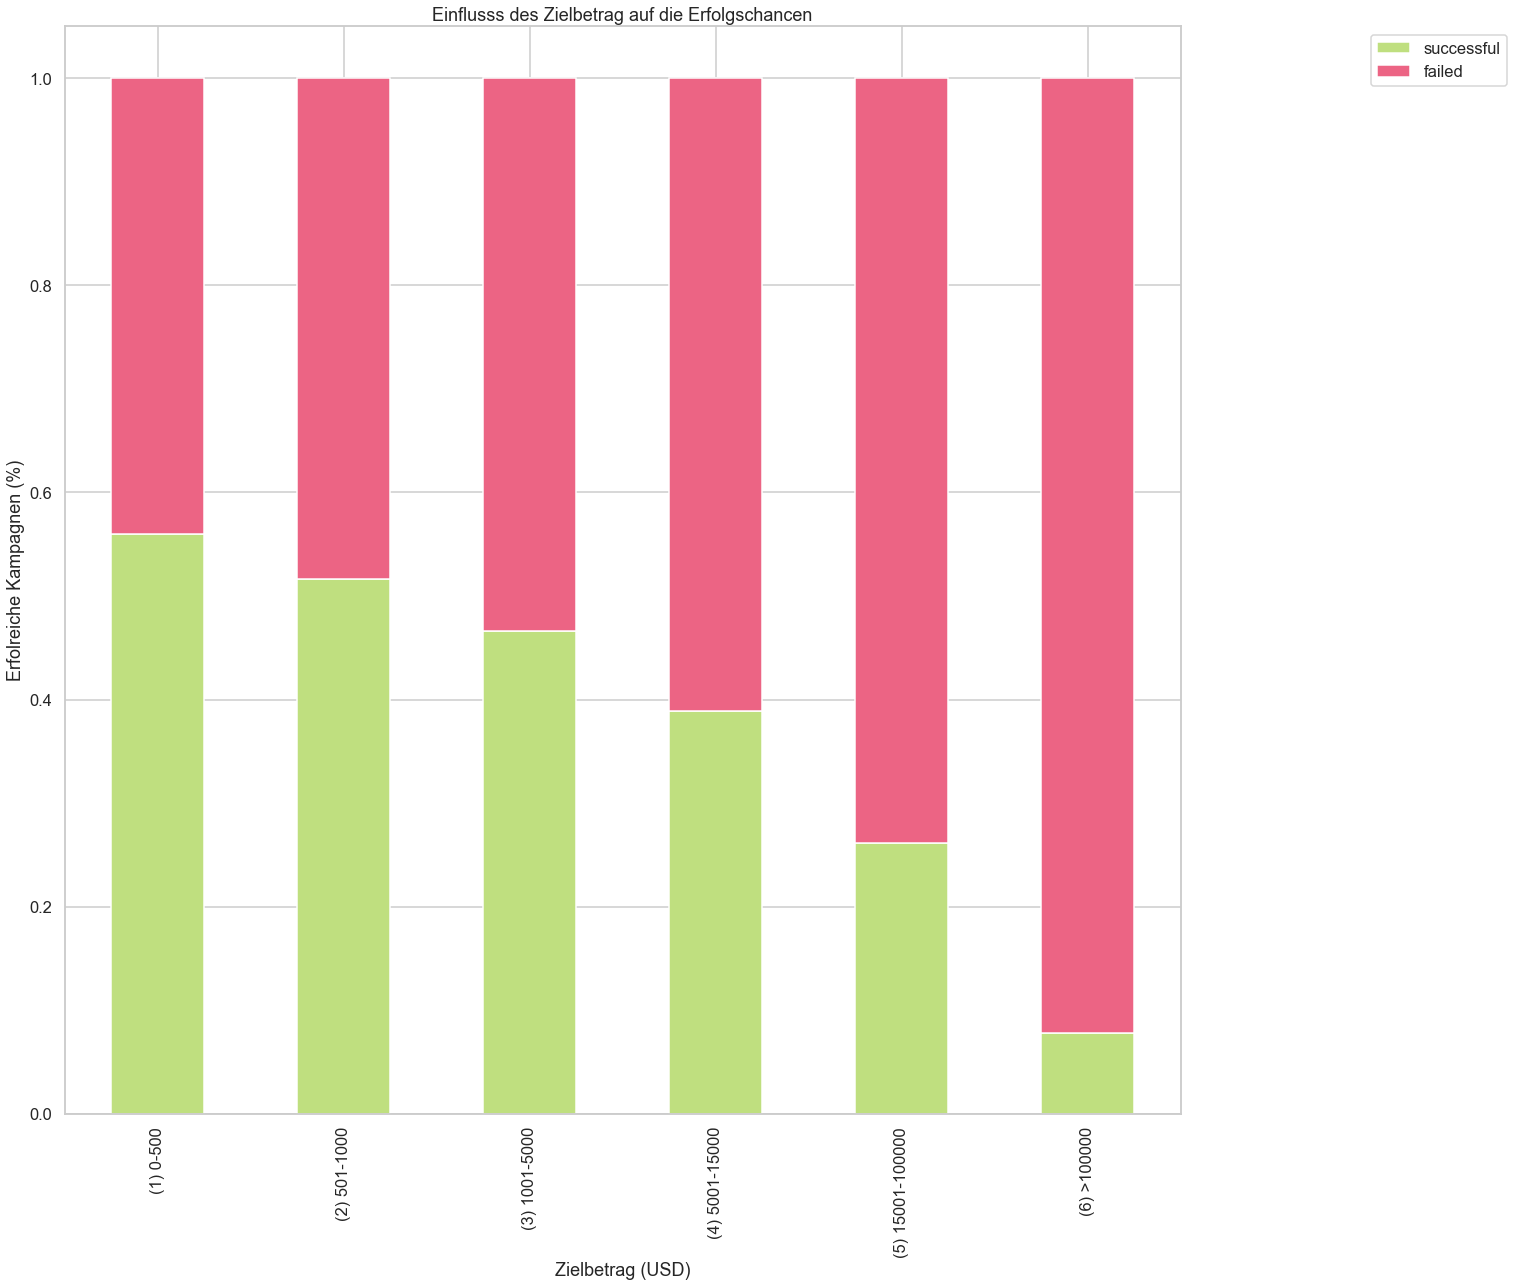

In [34]:
# Influence of the target amount on the success of the campaign- represented in 6 predefined levels.
# There is a clear curve that supports the hypothesis that the chances of success decrease as the 
# target amount increases. 


sns.set_style('whitegrid')   #more other options to try out: 'darkgrid', 'dark' and 'ticks'
sns.set_context('talk')    #bigger label sizes! try out 'poster' which will increase the default size even more
sns.set_palette(['#BFDF7F', '#EC6484'])

chart = pd.crosstab(clean_data["goal_levels"], clean_data["state"], normalize="index")   
chart = chart[['successful', 'failed']]   #turn values
chart.plot.bar(stacked=True)

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))   # legend outside graph
plt.rcParams["figure.figsize"] = [10, 8]    #resize
plt.title("Einflusss des Zielbetrag auf die Erfolgschancen")   #title
plt.xlabel("Zielbetrag (USD)")
plt.ylabel("Erfolreiche Kampagnen (%)");

In [35]:
# influence of the target amount on the success of the campaign - presented in 6 predefined levels
# for amounts up to 1000€ over 50% chance

pd.crosstab(clean_data["goal_levels"], clean_data["state"], normalize="index").round(4) *100

state,failed,successful
goal_levels,,
(1) 0-500,43.99,56.01
(2) 501-1000,48.40,51.60
(3) 1001-5000,53.40,46.60
(4) 5001-15000,61.15,38.85
(5) 15001-100000,73.87,26.13
(6) >100000,92.17,7.83


### 5.4 H4: Influence of campaign duration--> chances of success.
Assumption: The duration of the croudfunding campaign could have an influence on the chances of success. 
The hypothesis is: a medium duration is promising, since too short a duration may not be sufficient to promote the project sufficiently, while too long a duration will lead to a decline in interest and no pressure to make a decision.

In [36]:
# Prospects of success per term (days) in percent

data_time = pd.crosstab(clean_data["lifespan"], clean_data["state"], normalize="index")
data_time_sort = data_time.sort_values(by=['successful'], ascending=False).round(4) *100

In [37]:
data_time_sort.head(30)

state,failed,successful
lifespan,,
22.0,37.55,62.45
16.0,38.12,61.88
11.0,38.89,61.11
17.0,39.48,60.52
23.0,39.72,60.28
21.0,41.51,58.49
24.0,41.54,58.46
9.0,41.67,58.33
19.0,41.86,58.14


In [38]:
data_time_sort.tail(5)

state,failed,successful
lifespan,,
87.0,70.49,29.51
58.0,70.63,29.37
59.0,71.87,28.13
92.0,77.27,22.73
60.0,77.75,22.25


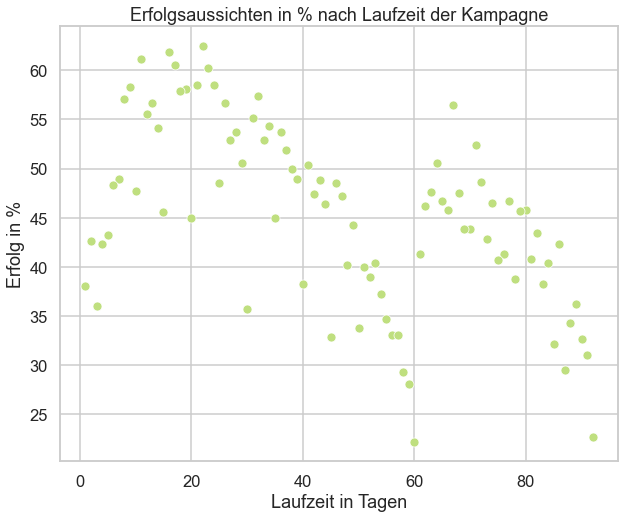

In [39]:
sns.set_style('whitegrid')   
sns.set_context('talk')

sns.scatterplot(data=data_time_sort, x="lifespan", y="successful")

plt.rcParams["figure.figsize"] = [10,10]    #resize
plt.title("Erfolgsaussichten in % nach Laufzeit der Kampagne")   #title
plt.xlabel("Laufzeit in Tagen")
plt.ylabel("Erfolg in %");

# up to 8 days term chance of success below 50%
# from 39 days decreasing chance of success below 50%
# best values in the range between 8 and 38 days
# strong decrease of success between 38 and 60 days, afterwards again increase of chances of success 
# (possibly large projects with longer duration?)

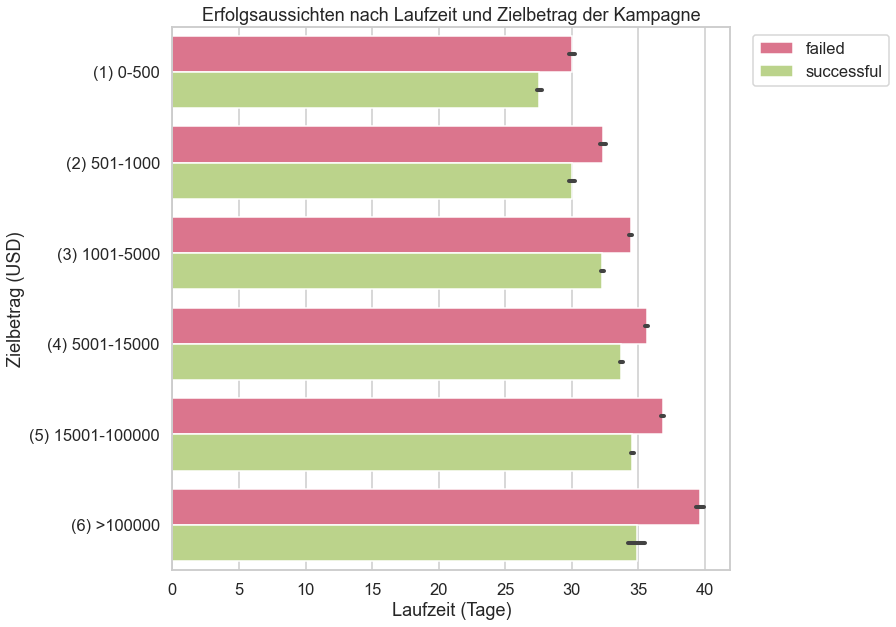

In [40]:
sns.set_style('whitegrid')   
sns.set_context('talk') 
sns.set_palette(['#EC6484', '#BFDF7F'])

sns.barplot(x="lifespan", y="goal_levels", hue="state", data=clean_data, 
            order=["(1) 0-500", "(2) 501-1000", "(3) 1001-5000", "(4) 5001-15000","(5) 15001-100000", "(6) >100000"])

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))   # legend outside graph
plt.rcParams["figure.figsize"] = [10, 8]    #resize
plt.title("Erfolgsaussichten nach Laufzeit und Zielbetrag der Kampagne")   #title
plt.xlabel("Laufzeit (Tage)")
plt.ylabel("Zielbetrag (USD)");

# with increasing target amounts, the selected campaign duration also increases

## Graphics for the publication

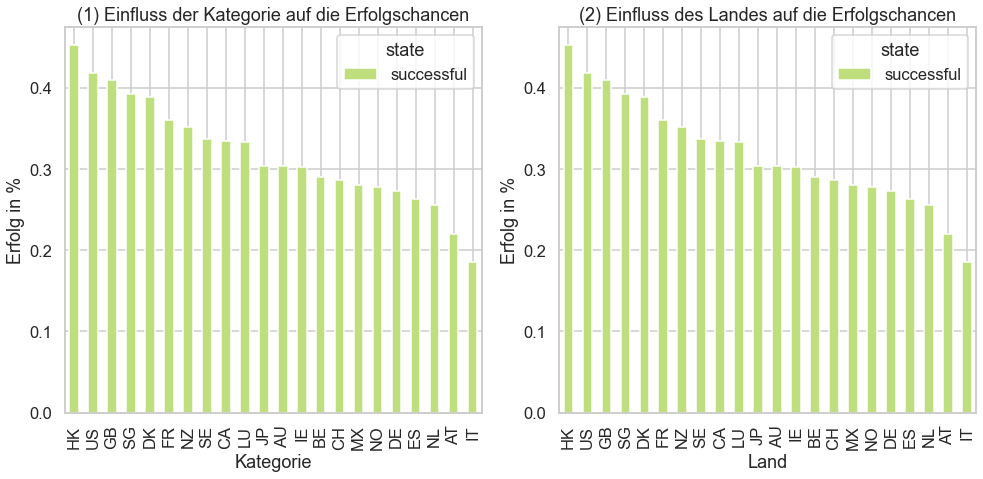

In [41]:
# Figure 1: Influence category / influence country

plt.close("all")
fig, ax = plt.subplots(1, 2, figsize=[14, 7])
sns.set_palette(['#BFDF7F','#EC6484'])

x1 = pd.crosstab(clean_data["main_category"], clean_data["state"], normalize="index")
x1 = table[['successful']]
x1.sort_values("successful", ascending=False).plot.bar(ax=ax[0])
ax[0].set_title("(1) Einfluss der Kategorie auf die Erfolgschancen")
ax[0].set_ylabel("Erfolg in %")
ax[0].set_xlabel("Kategorie")

x2 = pd.crosstab(clean_data_country["country"], clean_data_country["state"], normalize="index")   #turn values
x2 = x2[['successful']]
x2.sort_values("successful", ascending=False,).plot.bar(ax=ax[1])
ax[1].set_title("(2) Einfluss des Landes auf die Erfolgschancen")
ax[1].set_xlabel("Land")
ax[1].set_ylabel("Erfolg in %")

plt.tight_layout()
plt.savefig(os.path.join( "output", "fig_01.pdf"))

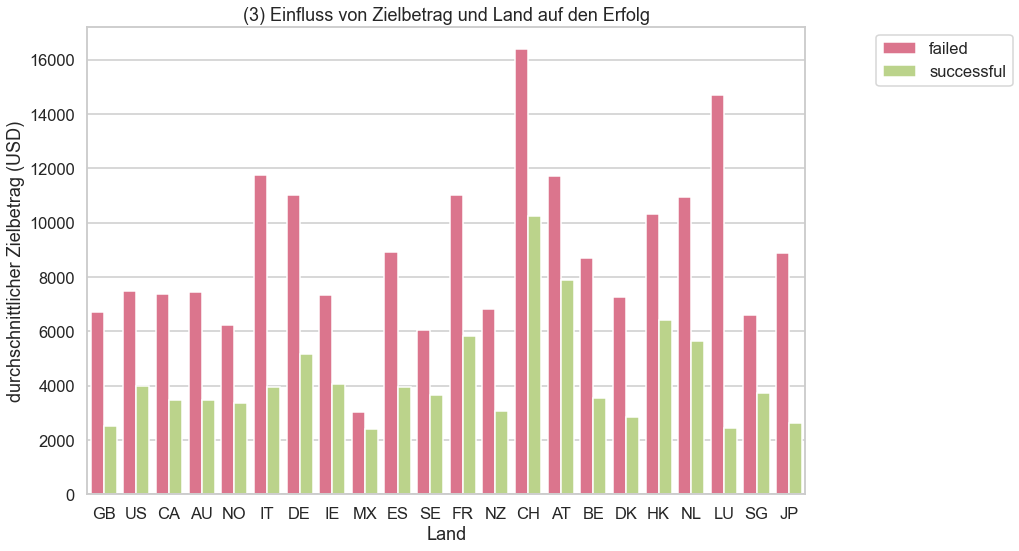

In [42]:
# Figure 2: Influence of target amount and country on success

plt.close("all")

plt.figure(figsize=(15, 8))  
sns.set_palette(['#EC6484','#BFDF7F'])
sns.barplot(data=clean_data_country, x="country", y="usd_goal_real", hue="state",
            estimator = np.median,
            ci = 0)

plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))   # legend outside graph
plt.rcParams["figure.figsize"] = [20,20]    #resize
plt.title("(3) Einfluss von Zielbetrag und Land auf den Erfolg")   #title
plt.xlabel("Land")
plt.ylabel("durchschnittlicher Zielbetrag (USD)")

plt.tight_layout()
plt.savefig(os.path.join( "output", "fig_02.pdf"))

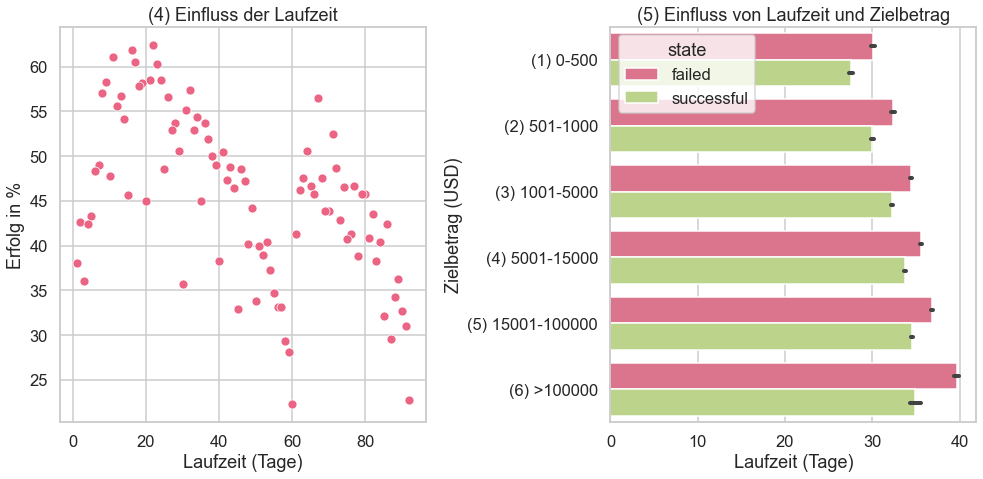

In [43]:
# Figure 3:Prospects of success by campaign duration / by campaign duration and target amount.

plt.close("all")
fig, ax = plt.subplots(1, 2, figsize=[14, 7])
sns.set_palette(['#BFDF7F','#EC6484'])


x1 = sns.scatterplot(data=data_time_sort, x="lifespan", y="successful", ax=ax[0])
ax[0].set_title("(4) Einfluss der Laufzeit")
ax[0].set_ylabel("Erfolg in %")
ax[0].set_xlabel("Laufzeit (Tage)")

sns.set_palette(['#EC6484','#BFDF7F'])

x2 = sns.barplot(x="lifespan", y="goal_levels", hue="state", data=clean_data, 
            order=["(1) 0-500", "(2) 501-1000", "(3) 1001-5000", "(4) 5001-15000","(5) 15001-100000", "(6) >100000"],
            ax=ax[1])
ax[1].set_title("(5) Einfluss von Laufzeit und Zielbetrag")
ax[1].set_xlabel("Laufzeit (Tage)")
ax[1].set_ylabel("Zielbetrag (USD)")

plt.tight_layout()
plt.savefig(os.path.join( "output", "fig_03.pdf"))

In [44]:
clean_data["state"].value_counts(normalize=True).round(4)*100

failed        59.61
successful    40.39
Name: state, dtype: float64

In [45]:
pd.crosstab(clean_data["main_category"], clean_data["state"], normalize="index").round(4)*100

state,failed,successful
main_category,,
Art,55.11,44.89
Comics,40.86,59.14
Crafts,72.95,27.05
Dance,34.56,65.44
Design,58.41,41.59
Fashion,71.72,28.28
Film & Video,58.21,41.79
Food,72.41,27.59
Games,56.11,43.89


In [46]:
pd.crosstab(clean_data_country["country"], clean_data_country["state"], normalize="index").round(4)*100

state,failed,successful
country,,
AT,77.94,22.06
AU,69.62,30.38
BE,70.94,29.06
CA,66.58,33.42
CH,71.32,28.68
DE,72.73,27.27
DK,61.12,38.88
ES,73.73,26.27
FR,63.97,36.03


In [47]:
pd.crosstab(clean_data["main_category"], clean_data["state"], normalize="index").round(4)*100

state,failed,successful
main_category,,
Art,55.11,44.89
Comics,40.86,59.14
Crafts,72.95,27.05
Dance,34.56,65.44
Design,58.41,41.59
Fashion,71.72,28.28
Film & Video,58.21,41.79
Food,72.41,27.59
Games,56.11,43.89


In [48]:
pd.crosstab(clean_data["main_category"], clean_data["goal_levels"], normalize="index").round(4)*100

goal_levels,(1) 0-500,(2) 501-1000,(3) 1001-5000,(4) 5001-15000,(5) 15001-100000,(6) >100000
main_category,,,,,,
Art,17.04,12.60,39.89,18.84,10.17,1.46
Comics,11.38,11.08,42.10,24.37,10.64,0.44
Crafts,21.60,14.66,35.74,17.98,9.09,0.92
Dance,5.60,10.36,53.82,22.64,7.05,0.53
Design,5.32,5.35,23.91,27.82,33.87,3.73
Fashion,8.62,8.69,31.82,27.89,21.69,1.29
Film & Video,6.45,7.51,32.10,25.86,23.87,4.20
Food,8.21,4.17,21.85,28.64,32.66,4.47
Games,8.31,7.26,27.52,28.01,24.88,4.02
